In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
plt.style.use("seaborn-bright")
%matplotlib inline

# Данные

Описание колонок датасета:

*   **customer_id** — Клиентский идентификатор.
*   **credit_score** — Кредитный рейтинг.
*   **country** — Страна.
*   **gender** — Пол.
*   **age** — Возраст.
*   **tenure** — Стаж.
*   **balance** — Баланс.
*   **products_number** — Количество продуктов.
*   **credit_card** — Кредитная карта.
*   **active_member** — Активный член.
*   **estimated_salary** — Предполагаемая зарплата.
*   **churn** — Отток, используется как целевая переменная. 1, если клиент покинул банк за определенный период, или 0, если нет.



# 1. Предобработка данных

In [ ]:
# Загрузим данные
df = pd.read_csv('data/Bank_Customer_Churn_Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# общая информация о датасете
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB



В датасете содержатся следующие типы данных:

* customer_id: Столбец содержит числовые идентификаторы клиентов банка.
* credit_score: Здесь представлены числовые значения кредитного рейтинга клиентов.
* country: Столбец указывает на страну клиента и содержит категориальные данные (названия стран).
* gender: Столбец содержит информацию о поле клиента, категориальные данные: "Female" и "Male".
* age: Возраст клиентов, представлен числовыми значениями.
* tenure: Столбец содержит числовые значения, представляющие стаж клиентов в банке.
* balance: Баланс клиентов на их счетах, представлен числовыми значениями.
* products_number: Число продуктов, используемых клиентами, представлено числовыми данными.
* credit_card: Данный столбец, является бинарным, указывая, имеет ли клиент кредитную карту. Принимает значения 0 (нет) и 1 (да).
* active_member: Бинарный столбец, указывающий, является ли клиент активным членом банка. Также принимает значения 0 (неактивный) и 1       (активный).
* estimated_salary: Предполагаемая зарплата клиентов, представлен числовыми значениями.
* churn: Целевая переменная, указывающая на отток клиента. Она также бинарна, принимая значения 0 (не произошел отток) и 1 (произошел отток).

В этом датасете присутствуют числовые, категориальные и бинарные типы данных.

In [ ]:
df.isnull().sum() # Пропусков нет

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
# Выделим колонки с категориальными признаками
categorical_columns = df.select_dtypes(include=['object']).columns

# Посмотрим на зачения категориальных переменных, чтобы убедиться что
# нет пропусков (пустых строк, незначимых строк)
for i in categorical_columns:
  print(i)
  print(df[i].value_counts(), end='\n\n')

country
country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

gender
gender
Male      5457
Female    4543
Name: count, dtype: int64



In [ ]:
# Удалим колонку уникальных индификаторов customer_id
print("Количество повротов в колонке customer_id: ", len(df) - df.customer_id.nunique())
df.drop(columns='customer_id', inplace=True)

Количество повротов в колонке customer_id:  0


# EDA

Разделим датасет на тестовую и тренировочную выборки, чтобы проводить EDA только по тренировочной

In [ ]:
# Делим датасет на тренировочную и тестовую выборки
df_train, df_test = train_test_split(df, test_size=0.25, stratify=df['churn'], random_state =42)

len(df_train), len(df_test)

(7500, 2500)

Выведем основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение.

In [ ]:
df_train.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,7500.000000,7500.00000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,650.507733,38.98000,5.022800,76328.197195,1.532267,0.707200,0.516667,99540.472065,0.203733
std,96.637724,10.55188,2.893613,62385.961630,0.581897,0.455078,0.499755,57295.127395,0.402800
min,350.000000,18.00000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.00000,3.000000,0.000000,1.000000,0.000000,0.000000,50417.950000,0.000000
50%,652.000000,37.00000,5.000000,96943.320000,1.000000,1.000000,1.000000,98940.675000,0.000000
75%,717.000000,44.00000,8.000000,127785.447500,2.000000,1.000000,1.000000,148428.572500,0.000000
max,850.000000,92.00000,10.000000,222267.630000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
features = df_train.columns.drop('churn')
subsets = ['credit_score']
df_train.groupby('churn')[features].mean(numeric_only=True)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,
0,652.159578,37.523778,5.016075,72586.958505,1.546383,0.710147,0.555090,98868.429612
1,644.051702,44.671466,5.049084,90950.368305,1.477094,0.695681,0.366492,102167.067310


**Balance**

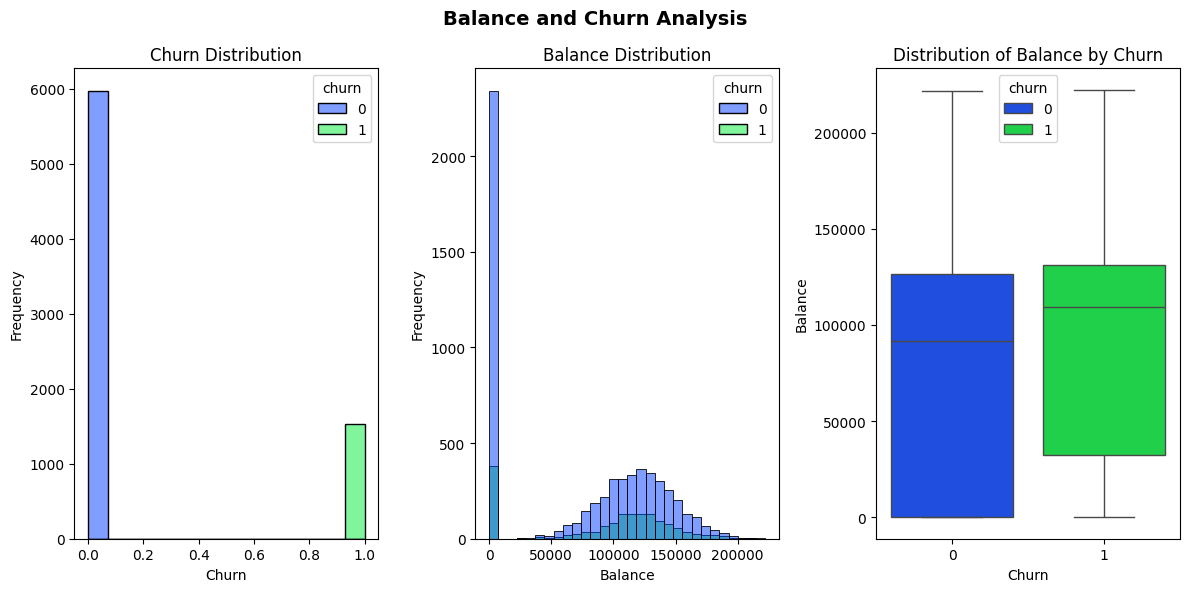

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Гистограмма для распределения классов
sns.histplot(data=df_train, x="churn", hue="churn", ax=axs[0])
axs[0].set_xlabel("Churn")
axs[0].set_ylabel("Frequency")
axs[0].set_title("Churn Distribution");

# Гистограмм для распределения баланса клиентов
sns.histplot(data=df_train, x="balance", ax=axs[1], hue="churn", bins=30)
axs[1].set_xlabel("Balance")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Balance Distribution")

# График ящика с усами (boxenplot)
sns.boxplot(x="churn", y="balance", data=df_train, hue="churn", ax=axs[2])
axs[2].set_xlabel("Churn")
axs[2].set_ylabel("Balance")
axs[2].set_title("Distribution of Balance by Churn")

# Добавление общего заголовка для всего изображения
plt.suptitle("Balance and Churn Analysis", fontsize=14, weight='bold')
plt.tight_layout();

Обратим внимание, что целевая переменная несбалансирована по классам: количество экземпляров класса с меткой 1 в четыре раза меньше,
чем с меткой 0. Однако посмотрев на гистограмму распределения баланса на счету, можнро сказать, что распределение у классов одинаковое. Кроме того, ширина боксплота для распределения класса 0 значительно превышает ширину боксплота для класса 1, что указывает на большую вариативность значений в этом классе.

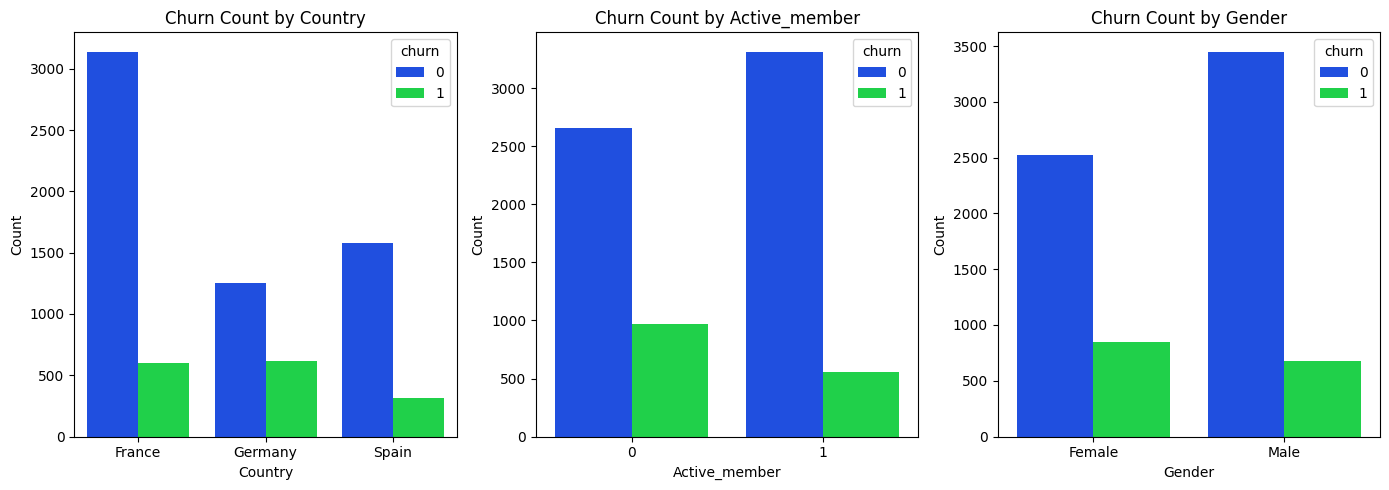

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))

# График количества оттоков по странам
sns.countplot(data=df_train, x='country', hue='churn', ax=axs[0])
axs[0].set_xlabel("Country")
axs[0].set_ylabel("Count")
axs[0].set_title("Churn Count by Country")

# График количества оттоков по активным пользователям
sns.countplot(data=df_train, x='active_member', hue='churn', ax=axs[1])
axs[1].set_xlabel("Active_member")
axs[1].set_ylabel("Count")
axs[1].set_title("Churn Count by Active_member");

# График количества оттоков по активным пользователям
sns.countplot(data=df_train, x='gender', hue='churn', ax=axs[2])
axs[2].set_xlabel("Gender")
axs[2].set_ylabel("Count")
axs[2].set_title("Churn Count by Gender");

plt.tight_layout();

Как можем видеть, по 2 графику, видно, что отток среди неактивных клиентов выше, чем среди активных. Кроме того, из первого графика видно, что относительный отток наибольший в Германии. Из 1 график можно сказать что среди женщин относительный отток больше.

**Credit Score**

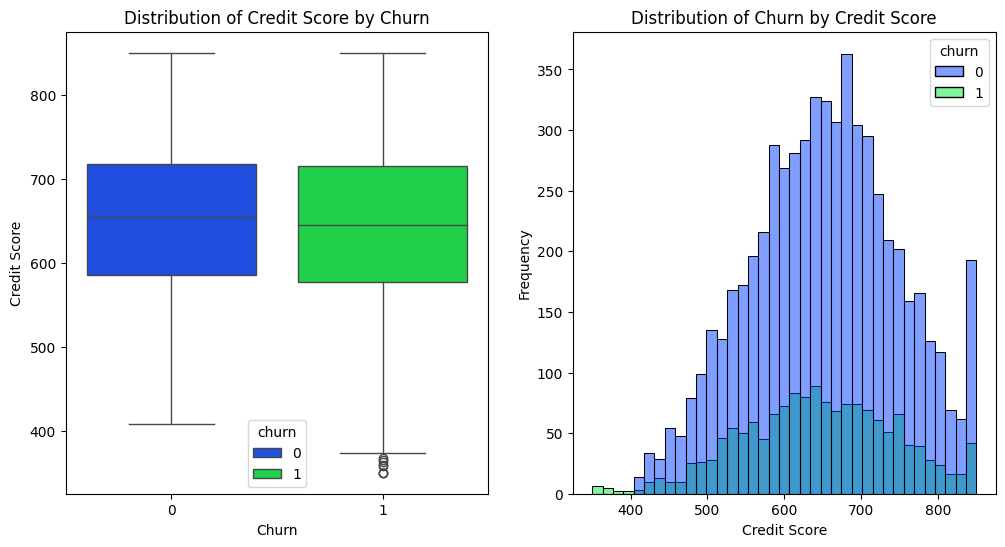

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# График ящика с усами распределения кредитного рейтинга
sns.boxplot(x="churn", y="credit_score", data=df_train, hue="churn", ax=axs[0])
axs[0].set_xlabel("Churn")
axs[0].set_ylabel("Credit Score")
axs[0].set_title("Distribution of Credit Score by Churn")

# Гистограмма кредитного рейтинга
sns.histplot(data=df_train, x="credit_score", hue="churn", ax=axs[1])
axs[1].set_xlabel("Credit Score")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Distribution of Churn by Credit Score")
plt.tight_layout();

Из графиков видно, что распределение кредитного рейтинга практически одинаково у обоих классов, что говорит о том, что этот признак, вероятно, не является особенно значимым для прогнозирования оттока клиентов.

**Age**

Text(0.5, 1.0, 'Distribution of Churn by Age')

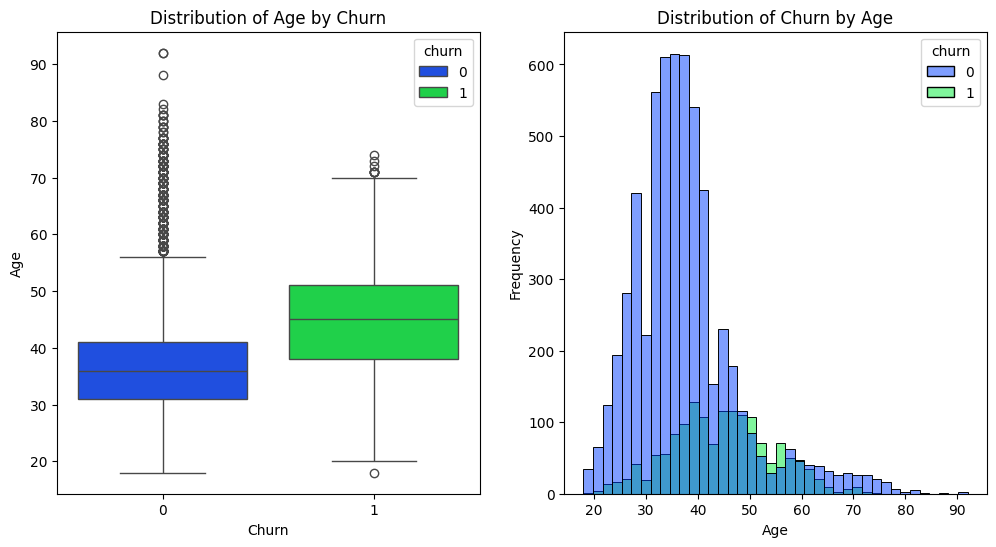

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# График ящика с усами распределения возраста
sns.boxplot(x="churn", y="age", data=df_train, hue="churn", ax=axs[0])
axs[0].set_xlabel("Churn")
axs[0].set_ylabel("Age")
axs[0].set_title("Distribution of Age by Churn")

# Гистограмма возраста
sns.histplot(data=df_train, x="age", hue="churn", bins=40, ax=axs[1])
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Distribution of Churn by Age")
plt.tight_layout();

Как видно из графиков, распределение возраста людей, покинувших банк, смещено в сторону более высоких возрастных категорий. Это может означать, что с возрастом вероятность оттока увеличивается.

**Products_number** and **Tenure**

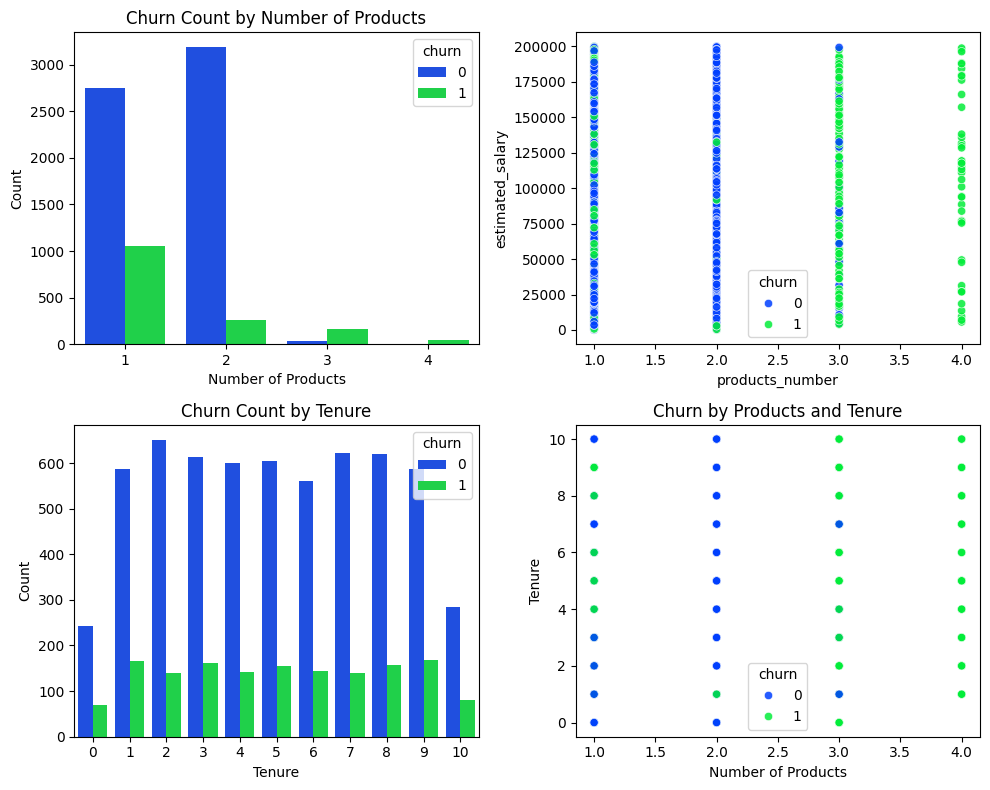

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# График количества оттоков по числу продуктов
sns.countplot(data=df_train, x='products_number', hue='churn', ax=axs[0,0])
axs[0,0].set_xlabel("Number of Products")
axs[0,0].set_ylabel("Count")
axs[0,0].set_title("Churn Count by Number of Products")

# Точечная диаграмма зарплаты от числа продуктов
sns.scatterplot(data=df_train, x="products_number", y="estimated_salary", hue="churn", alpha=0.85, ax=axs[0,1])
axs[0,0].set_xlabel("Number of Products")
axs[0,0].set_ylabel("Count")
axs[0,0].set_title("Churn Count by Number of Products")

# График количества оттоков по стажу
sns.countplot(data=df_train, x='tenure', hue='churn', ax=axs[1,0])
axs[1,0].set_xlabel("Tenure")
axs[1,0].set_ylabel("Count")
axs[1,0].set_title("Churn Count by Tenure")

# Точечная диаграмма стажа от числа продуктов
sns.scatterplot(data=df_train, x="products_number", y="tenure", hue="churn", alpha=0.85, ax=axs[1,1])
axs[1,1].set_xlabel("Number of Products")
axs[1,1].set_ylabel("Tenure")
axs[1,1].set_title("Churn by Products and Tenure")
plt.tight_layout();

Из этих графиков можно сделать вывод, что связь между оттоком и стажем работы в банке не так очевидна, как связь между оттоком и количеством купленных продуктов. Например, клиенты, купившие более двух продуктов, чаще всего покидают банк, в то время как те, кто купил два продукта чаще всего остаются в банке.

**Correlation**

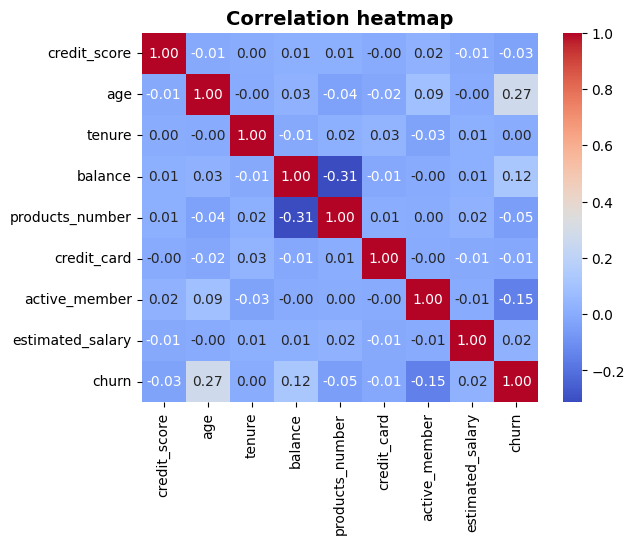

In [ ]:
ax = sns.heatmap(df_train.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt="0.2f")
ax.set_title("Correlation heatmap", fontsize=14, weight='bold')
plt.show()

Из корреляционного анализа, видим что корреляции между признаками нет. Есть только слабые корреляции не привышающие по модулю 0.31.

**Pairplot**

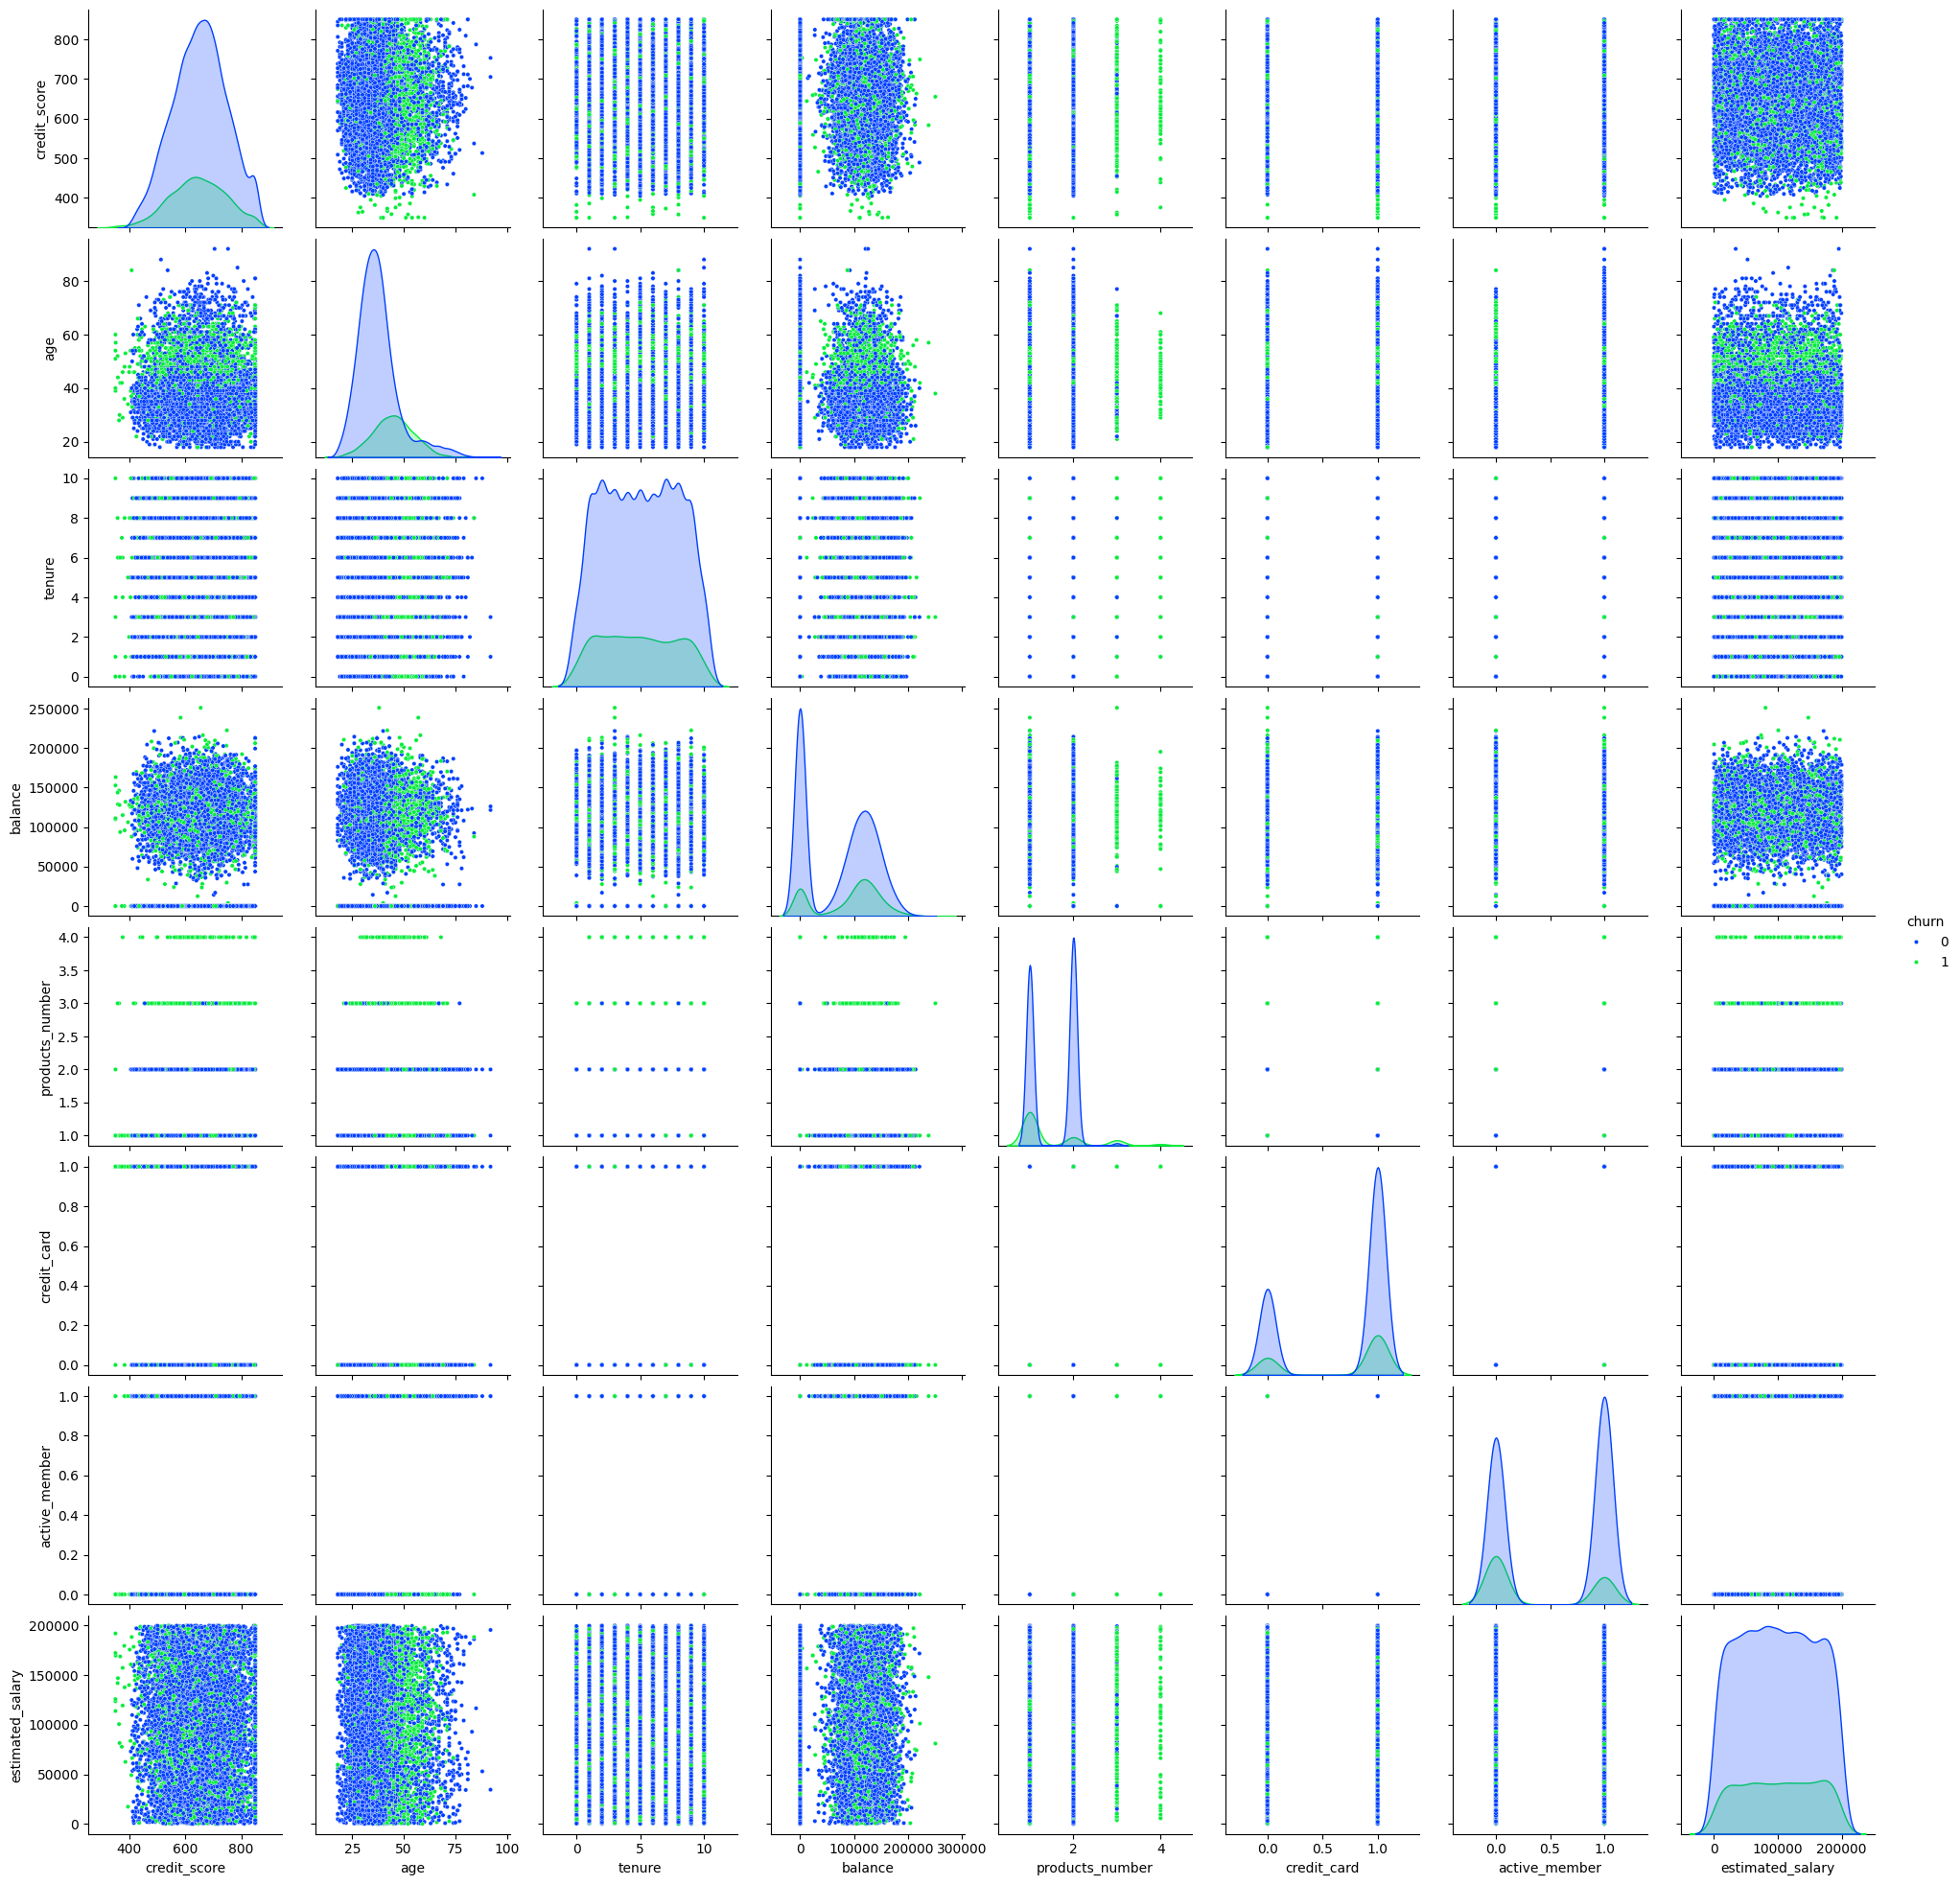

In [ ]:
# Парные графики для сравнения нескольких переменных
sns.pairplot(df.drop(columns=['country',	'gender']), hue='churn', diag_kind='kde', plot_kws={'s': 10})
plt.show()

# Закодируем категориальные переменные

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, classification_report, auc, precision_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler


In [ ]:
# Делим датасет на X и y
X_train = df_train.drop(columns='churn')
y_train = df_train['churn']

X_test = df_test.drop(columns='churn')
y_test = df_test['churn']

print(X_test[['credit_card']].value_counts(), end='\n\n')
print(X_test[['active_member']].value_counts())

credit_card
1              1751
0               749
Name: count, dtype: int64

active_member
1                1276
0                1224
Name: count, dtype: int64


In [ ]:
columns_no_normalize = ['credit_card', 'active_member', 'country', 'gender']
features_to_normalize = [col for col in X_train.columns if col not in columns_no_normalize]

# Создание экземпляра StandardScaler
scaler = StandardScaler()

# Нормализация обучающего набора
X_train[features_to_normalize] = scaler.fit_transform(X_train[features_to_normalize])

# Применение того же масштабирования к тестовому набору
X_test[features_to_normalize] = scaler.transform(X_test[features_to_normalize])

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True, columns=categorical_columns, dtype=int)
X_test = pd.get_dummies(X_test, drop_first=True, columns=categorical_columns, dtype=int)

In [ ]:
X_train

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
5866,0.874378,1.328762,1.028955,0.761715,0.803861,0,1,1.237787,0,0,0
1938,-1.371272,-0.092881,-0.699103,0.234517,-0.914771,0,1,1.095526,0,0,1
4194,-0.812446,1.423538,1.374567,0.337508,-0.914771,1,1,1.679687,1,0,0
6332,-0.326061,-0.377209,-0.353492,0.225786,-0.914771,1,1,-1.378660,0,0,0
1,-0.439896,0.191448,-1.390327,0.119901,-0.914771,0,1,0.226947,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3254,-1.019419,1.044433,-0.353492,0.718917,-0.914771,1,0,0.313566,1,0,1
4644,0.636360,3.319061,-0.007880,-1.223565,0.803861,0,0,0.905641,0,1,1
8942,0.170672,-0.187657,1.374567,-0.072798,0.803861,1,1,-0.555157,0,0,0
2935,0.377644,-0.377209,1.028955,0.395311,0.803861,1,0,-1.349126,0,1,1


In [ ]:
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)

models = [lrc, rfc, gbdt, xgb]

In [ ]:
def train_model(model, X_train, X_test, y_train, y_test):
      model.fit(X_train,y_train)
      y_pred = model.predict(X_test)
      roc_auc = roc_auc_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred)
      return roc_auc, precision

In [ ]:
for model in models:
    roc_auc, precision = train_model(model, X_train, X_test, y_train, y_test)
    print()
    print("For: ", model)
    print("ROC-AUC: ", roc_auc)
    print("Precision: ", precision)


For:  LogisticRegression(penalty='l1', solver='liblinear')
ROC-AUC:  0.57896141674865
Precision:  0.5987654320987654

For:  RandomForestClassifier(n_estimators=50, random_state=2)
ROC-AUC:  0.7248023769043209
Precision:  0.7767295597484277

For:  GradientBoostingClassifier(n_estimators=50, random_state=2)
ROC-AUC:  0.7209841141719269
Precision:  0.8235294117647058

For:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=No

In [ ]:
# Функция нахождения лучшей модели
def best_model(models, X_train, X_test, y_train, y_test):
    best_roc_auc = 0
    best_ml = None
    for model in models:
      y_pred = model.predict(X_test)
      roc_auc = roc_auc_score(y_test, y_pred)
      if roc_auc > best_roc_auc:
        best_ml = model
        best_roc_auc = roc_auc
    return best_ml

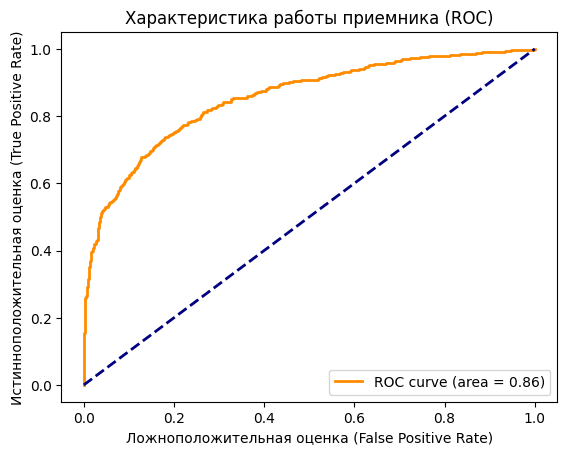

In [ ]:
# Построим ROC-AUC кривую для лучшей модели
model = best_model(models, X_train, X_test, y_train, y_test)

# Предсказанные вероятности класса 1
y_pred_proba = model.predict_proba(X_test)[:,1]

# Вычисление ROC кривой и площади под кривой (AUC)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Построение ROC кривой
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])  # изменение пределов оси x для лучшей визуализации
plt.ylim([-0.05, 1.05])  # изменение пределов оси y для лучшей визуализации
plt.xlabel('Ложноположительная оценка (False Positive Rate)')
plt.ylabel('Истинноположительная оценка (True Positive Rate)')
plt.title('Характеристика работы приемника (ROC)')
plt.legend(loc="lower right")
plt.show()